# Lab 1 - GSS Happiness - Wrangling
## Group 11
## `! git clone https://www.github.com/DS3001/group11

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/selectedData.csv') # Import data into environment
df.head()

/home/wfn7ad/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,age,year,wrkstat,rincome,happy,satfin,satjob
0,23.0,1972,working full time,NaN,not too happy,not satisfied at all,a little dissatisfied
1,70.0,1972,retired,NaN,not too happy,more or less satisfied,NaN
2,48.0,1972,working part time,NaN,pretty happy,pretty well satisfied,moderately satisfied
3,27.0,1972,working full time,NaN,not too happy,not satisfied at all,very satisfied
4,61.0,1972,keeping house,NaN,pretty happy,pretty well satisfied,NaN


In [3]:
# wrangling
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(72390, 7) 

age        float64
year         int64
wrkstat     object
rincome     object
happy       object
satfin      object
satjob      object
dtype: object 

Index(['age', 'year', 'wrkstat', 'rincome', 'happy', 'satfin', 'satjob'], dtype='object') 



Many of the variables are of the "object" data type; because these data are categorical, this is okay.
We will look at age, year, and work status first.

count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age, dtype: float64 

[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.] 



<AxesSubplot:>

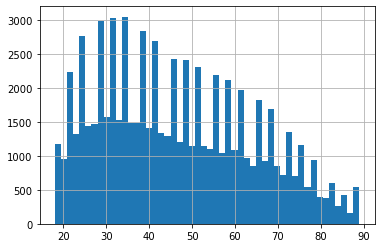

In [4]:
# Age
var = 'age'
print(df[var].describe(),'\n') # 72390-71612=769 missing values
print(df[var].unique(),'\n') # missing values are already in nan format
df[var].hist(bins=50) # Initial histogram, odd spikes may be due to how survey was previously administered

In [5]:
print('Total Missings: \n', sum(df[var].isnull()),'\n') # says 769 are missing, matches expected
gdf = df.loc[df[var].isnull() == 0, :] # makes df where only values that aren't null are included
print('Total Missings after nans removed: \n', sum(gdf[var].isnull()),'\n') # checks to see if nans were removed

Total Missings: 
 769 

Total Missings after nans removed: 
 0 



count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64 



<AxesSubplot:>

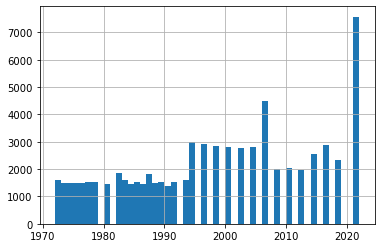

In [6]:
# Year
var = 'year'
print(df[var].describe(),'\n') # 72390-72390=0 missing values, no nans to remove
df[var].hist(bins=50) # Initial histogram, looks like some years are missing

count                 72354
unique                    8
top       working full time
freq                  35267
Name: wrkstat, dtype: object 

['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'other' nan] 

wrkstat
working full time                                                             35267
retired                                                                       10886
keeping house                                                                 10764
working part time                                                              7430
unemployed, laid off, looking for work                                         2621
in school                                                                      2187
other                                                                          1643
with a job, but not at work because of tempora

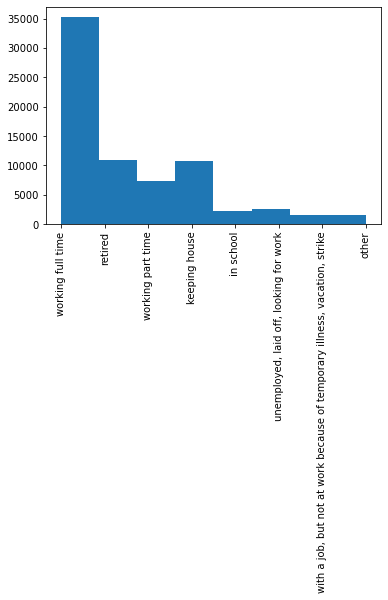

In [7]:
# Work status
var = 'wrkstat'
print(df[var].describe(),'\n') # 72390-72354=36 missing values expected
print(df[var].unique(),'\n') # 8 categories not including nan (will remove nans and "other")
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=8,grid=False), '\n') # plot
plt.xticks(rotation=90) # makes plot readable
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # 36 missing values, already in nan form

In [8]:
gdf.loc[gdf[var] == 'with a job, but not at work because of temporary illness, vacation, strike', var] = 'with job, not at work rn' #shortening variable name  
gdf = gdf.loc[gdf['wrkstat'].isnull() == 0,:] # Removing the nan values as only 36 
gdf = gdf.loc[gdf['wrkstat'] != 'other',:] # Even though there are 1,643 "other" values, we decided to remove them
print(gdf[var].value_counts(), '\n')
gdf = gdf.rename(columns = {'wrkstat': 'work status'})

wrkstat
working full time                         34910
retired                                   10718
keeping house                             10672
working part time                          7366
unemployed, laid off, looking for work     2589
in school                                  2175
with job, not at work rn                   1544
Name: count, dtype: int64 



Now we will investigate income and convert the entries into real dollar amounts. We will also clean work satisfaction and financial satisfaction.

In [9]:
# Income
cpi = pd.read_csv('./data/cpi.csv') #data from website https://liberalarts.oregonstate.edu/spp/polisci/faculty-staff/robert-sahr/inflation-conversion-factors-years-1774-estimated-2024-dollars-recent-years/individual-year-conversion-factor-table-0 
                                    # in a new excel with the year and conversion factor for money for that year to 2016, estimates 2017 to 2022 conversion factor to 2016
cpi.head() #values from cpi data

,year,cf
0,1968,0.145
1,1969,0.153
2,1970,0.162
3,1971,0.169
4,1972,0.174


count               42333
unique                 12
top       $25,000 or more
freq                18249
Name: rincome, dtype: object 

[nan '$1,000 to $2,999' '$15,000 to $19,999' '$7,000 to $7,999'
 '$8,000 to $9,999' '$20,000 to $24,999' '$4,000 to $4,999'
 '$10,000 to $14,999' '$25,000 or more' '$3,000 to $3,999' 'under $1,000'
 '$5,000 to $5,999' '$6,000 to $6,999'] 

Total Missings: 
 30057 



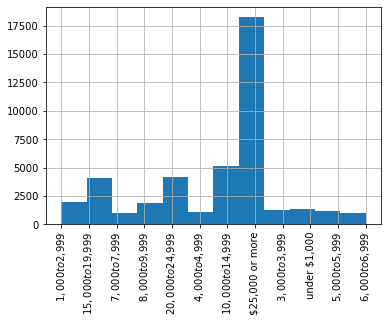

In [10]:
var = 'rincome'
print(df[var].describe(),'\n') # 72390-42333=30057 missing values
print(df[var].unique(),'\n') # missing values are already in nan format
df[var].hist(bins=12) # odd spikes may be due to how survey previously pooled ages (Methodological 56)
plt.xticks(rotation=90)
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # missing values match expected

In [11]:
gdf = gdf.loc[gdf['rincome'].isnull() == 0,:] # remove nans
gdf = gdf.replace(['$1,000 to $2,999','$15,000 to $19,999','$7,000 to $7,999','$8,000 to $9,999','$20,000 to $24,999','$4,000 to $4,999','$10,000 to $14,999','$25,000 or more','$3,000 to $3,999','under $1,000','$5,000 to $5,999','$6,000 to $6,999'], 
                [1500,17500,7500,9000,22500,4500,12500,25000,3500,1000,5500,6500]) # replace with middle
print(gdf[var].unique(),'\n') # check

[ 1500 17500  7500  9000 22500  4500 12500 25000  3500  1000  5500  6500] 



In [12]:
md = cpi.merge(gdf, on='year') #merging the data from the cpi and the data file cleaning on the common relation of year                                   
md['Income_2016'] = (md[var]/md['cf']) #creating the income related to the year of 2016 through the conversion factor -- divide the income by the conversion factor for that year
print(md.loc[md['year'] == 2022, 'cf']) #cf from 2022 to 2016 is 1.149

39974    1.149
39975    1.149
39976    1.149
39977    1.149
39978    1.149
         ...  
41862    1.149
41863    1.149
41864    1.149
41865    1.149
41866    1.149
Name: cf, Length: 1893, dtype: float64


               year            cf           age      rincome    Income_2016  \
count  41867.000000  41867.000000  41867.000000  41867.00000   41867.000000   
mean    1998.486039      0.692248     41.461414  17365.02496   27462.287865   
std       14.184826      0.271401     13.747698   8546.35000   16318.239273   
min     1974.000000      0.205000     18.000000   1000.00000     870.322019   
25%     1987.000000      0.473000     30.000000   9000.00000   17500.000000   
50%     1998.000000      0.679000     40.000000  22500.00000   25773.195876   
75%     2010.000000      0.909000     51.000000  25000.00000   35496.957404   
max     2022.000000      1.149000     89.000000  25000.00000  121951.219512   

         real_income  
count   41867.000000  
mean    31554.168757  
std     18749.656925  
min      1000.000000  
25%     20107.500000  
50%     29613.402062  
75%     40786.004057  
max    140121.951220   



<AxesSubplot:>

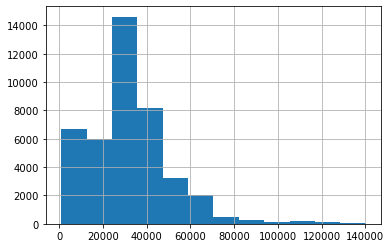

In [13]:
md['real_income'] = md['Income_2016'] *(1.149) # multiply the income from 2016 by the conversion factor for 2022 to get the value of money in 2022
md['real_income'].value_counts()
print(md.describe(),'\n')
md['real_income'].hist(bins=12)

In [14]:
gdf = gdf.rename(columns = {'rincome': 'income'})
gdf['income'] = md['real_income']

count            67588
unique               3
top       pretty happy
freq             37813
Name: happy, dtype: object 

['not too happy' 'pretty happy' 'very happy' nan] 

happy
pretty happy     37813
very happy       20385
not too happy     9390
Name: count, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 4802 



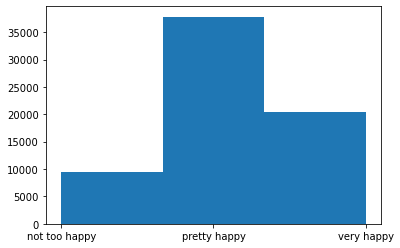

In [15]:
#happy
var = 'happy'
print(df[var].describe(),'\n') # 72390-67588=4,802 missing values expected
print(df[var].unique(),'\n') # 3 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=3,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of missings is same as nan
#assuming missing values is that people are unhappy

In [16]:
gdf.loc[gdf[var].isnull(), var] = 'not happy' # Changing rows with nans to a new category called "not happy"
print('Total Missings: \n', sum(gdf[var].isnull()),'\n') # checks that nulls were renamed

Total Missings: 
 0 



count                      67722
unique                         3
top       more or less satisfied
freq                       29987
Name: satfin, dtype: object 

['not satisfied at all' 'more or less satisfied' 'pretty well satisfied'
 nan] 

satfin
more or less satisfied    29987
pretty well satisfied     19726
not satisfied at all      18009
Name: count, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 4668 



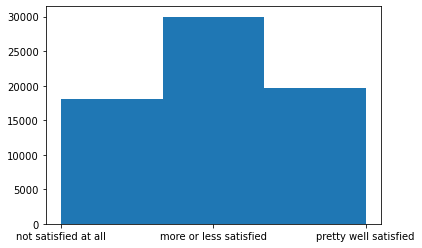

In [17]:
#satfin
var = 'satfin'
print(df[var].describe(),'\n') # 72390-67722=4,668 missing values expected
print(df[var].unique(),'\n') # 3 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=3,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of missings is same as nan

In [18]:
gdf = gdf.loc[gdf['satfin'].isnull() == 0,:] # remove nans
gdf = gdf.rename(columns = {'satfin': 'financial satisfaction'})

count              51887
unique                 4
top       very satisfied
freq               24718
Name: satjob, dtype: object 

['a little dissatisfied' nan 'moderately satisfied' 'very satisfied'
 'very dissatisfied'] 

satjob
very satisfied           24718
moderately satisfied     19854
a little dissatisfied     5157
very dissatisfied         2158
Name: count, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 20503 



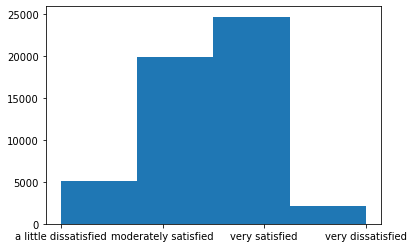

In [19]:
#satjob
var = 'satjob'
print(df[var].describe(),'\n') # 72390-51887=20,503 missing values expected
print(df[var].unique(),'\n') # 4 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=4,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of expected missings is same as nan

In [20]:
gdf = gdf.loc[gdf[var].isnull() == 0,:] # remove nans
gdf = gdf.rename(columns = {'satjob': 'job satisfaction'})

Data has been cleaned. Now we can take a look at the dataframe without missing values.

In [21]:
gdf.head()

,age,year,work status,income,happy,financial satisfaction,job satisfaction
3118,41.0,1974,working full time,56994.047619,very happy,more or less satisfied,very satisfied
3121,58.0,1974,working full time,56994.047619,pretty happy,more or less satisfied,moderately satisfied
3123,48.0,1974,working full time,41035.714286,very happy,pretty well satisfied,very satisfied
3126,54.0,1974,working full time,29636.904762,very happy,not satisfied at all,very satisfied
3131,22.0,1974,working full time,4559.523810,very happy,pretty well satisfied,very satisfied


In [22]:
print(gdf.shape) # 72,390-36,702=35,688 rows removed while cleaning
gdf.describe()

(36702, 7)


,age,year,income
count,36702.000000,36702.000000,22726.000000
mean,41.035420,1997.868699,30362.757880
std,13.172095,14.450309,16217.621422
min,18.000000,1974.000000,1000.000000
25%,30.000000,1986.000000,20975.659229
50%,40.000000,1996.000000,29132.860041
75%,51.000000,2010.000000,40062.761506
max,89.000000,2022.000000,113988.095238


# Now we will answer the first question: What age are people the most satisifed with their work? 

## First, we will start with an exploratory data analysis 

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
gdf['happy'].value_counts()

In [ ]:
gdf['job satisfaction'].value_counts()

In [ ]:
gdf['financial satisfaction'].value_counts()

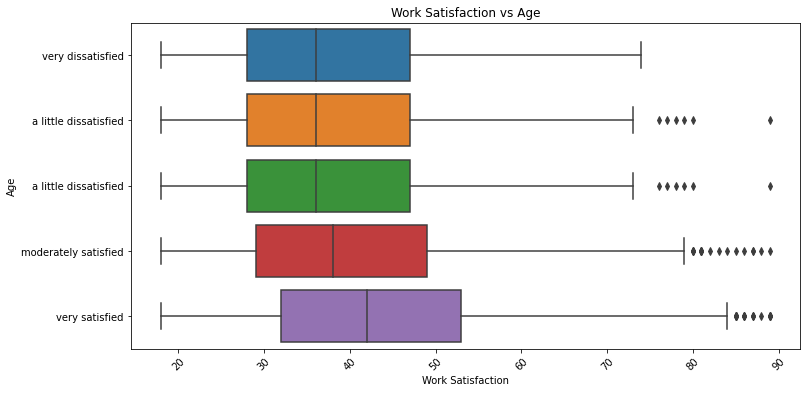

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdf, x='age', y='job satisfaction', order=["very dissatisfied", "a little dissatisfied", 
                                                           "a little dissatisfied", "moderately satisfied", 
                                                          "very satisfied"])
plt.title('Work Satisfaction vs Age')
plt.xlabel('Work Satisfaction')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

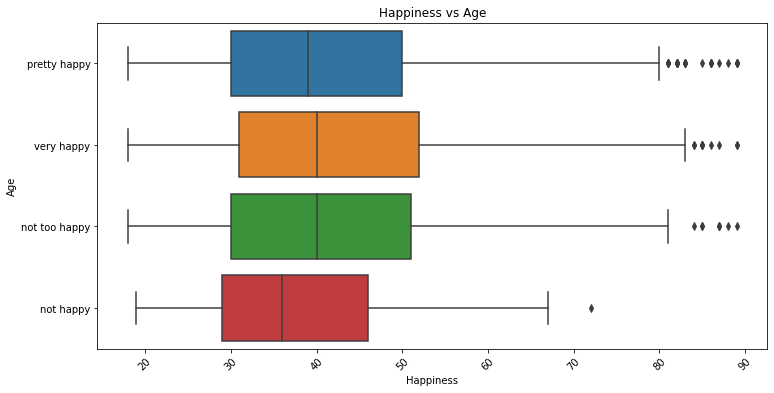

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdf, x='age', y='happy', order=["pretty happy", "very happy", "not too happy", "not happy" ])
plt.title('Happiness vs Age')
plt.xlabel('Happiness')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

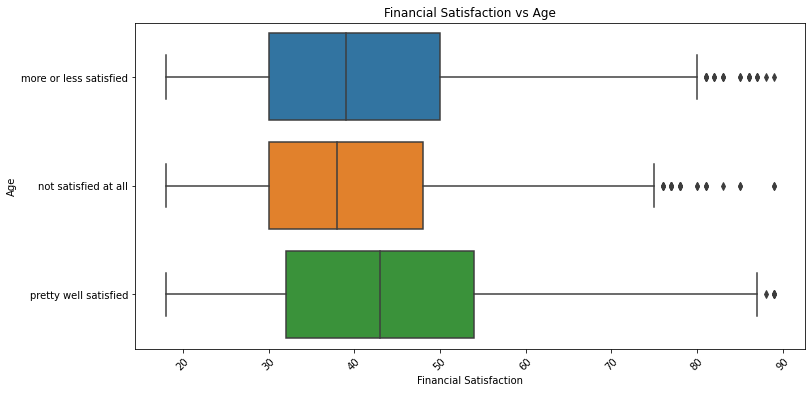

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdf, x='age', y='financial satisfaction', order=["more or less satisfied", "not satisfied at all", 
                                                            "pretty well satisfied"])
plt.title('Financial Satisfaction vs Age')
plt.xlabel('Financial Satisfaction')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# start of the EDA?  ( but move this up)

In [38]:
# Calculate mean and median age
mean_age = df['age'].mean()
median_age = df['age'].median()

# Calculate variance
age_variance = df['age'].var()

# Calculate quartiles
quartiles = df['age'].quantile([0.25, 0.5, 0.75])

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Age Variance: {age_variance}")
print(f"25th Percentile (Q1): {quartiles[0.25]}")
print(f"50th Percentile (Q2): {quartiles[0.5]}")
print(f"75th Percentile (Q3): {quartiles[0.75]}")

Mean Age: 46.55598218399631
Median Age: 44.0
Age Variance: 309.7746829018948
25th Percentile (Q1): 32.0
50th Percentile (Q2): 44.0
75th Percentile (Q3): 60.0
